# Ecommerce EDA, Feature Engineering and Model Training

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Importing the datasets

In [2]:
train_df=pd.read_csv(r"C:\Users\USER\Desktop\ML\train.csv")
train_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


From the dataset, this is an e-commerce information which can be used to predict the purchase capacity against various 
products using the given features

In [3]:
test_df=pd.read_csv(r"C:\Users\USER\Desktop\ML\test.csv")
test_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


Merge the train and test dataset

In [4]:
total_df=train_df.append(test_df)
total_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


All the columns(features) in the e-commerce dataset

In [5]:
total_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

To further understand the dataset; gives important info about features with respect to data type

In [6]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


to see the total number of rows and columns

In [7]:
total_df.shape

(783667, 12)

summary statistics of the integer variables

In [8]:
total_df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


The range of purchase lies between 23961 max and 12min products with an average of 9263

 user id is of no use in the model prediction (drop user id)

In [9]:
total_df.drop(['User_ID'],axis=1, inplace=True) ## axis=0 will drop horizontally but axis=1 drops vertically.
total_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


Conversion of categorical features to numerical features starting with gender

In [10]:
total_df['Gender']=total_df['Gender'].map({'F':0,'M':1})## assign value 0 to female and 1 to male
total_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


for Age

In [11]:
total_df['Age'].unique()##to visualize nos. of unique features are there in age
total_df['Age']=total_df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
total_df['Age'].unique()## target ordinal encoding was used
total_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


for City_Category

In [12]:
total_df_city=pd.get_dummies(total_df['City_Category'],drop_first=True)
total_df_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [13]:
total_df=pd.concat([total_df,total_df_city],axis=1)##adding B and C to the dataset so we can drop City_Category
total_df.drop('City_Category',axis=1, inplace=True)
total_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


Missing Values

In [14]:
total_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

All the product categories 2&3 and purchase are having many missing values
we fix missing values for Product_Categories 2&3 only because we are predicting purchase.

In [15]:
total_df['Product_Category_2'].unique() ##conversion to discrete values
total_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

replace missing values with mode since 8.0 is much in dataset

In [16]:
total_df['Product_Category_2'].mode()[0]

8.0

In [17]:
total_df['Product_Category_2']=total_df['Product_Category_2'].fillna(total_df['Product_Category_2'].mode()[0])
total_df['Product_Category_2'].isnull().sum()

0

All missing values for product category_2 are fixed

Fixing the missing values for product category_3

In [18]:
total_df['Product_Category_3'].unique() ##conversion to discrete values
total_df['Product_Category_3'].value_counts()

16.0    46469
15.0    39968
14.0    26283
17.0    23818
5.0     23799
8.0     17861
9.0     16532
12.0    13115
13.0     7849
6.0      6888
18.0     6621
4.0      2691
11.0     2585
10.0     2501
3.0       878
Name: Product_Category_3, dtype: int64

replace missing values with mode since 16.0 is much in dataset

In [19]:
total_df['Product_Category_3'].mode()[0]

16.0

In [20]:
total_df['Product_Category_3']=total_df['Product_Category_3'].fillna(total_df['Product_Category_3'].mode()[0])
total_df['Product_Category_2'].isnull().sum()

0

All missing values for product_category 3 are also fixed

In [21]:
total_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,8.0,16.0,7969.0,0,1


In [22]:
total_df['Stay_In_Current_City_Years']=total_df['Stay_In_Current_City_Years'].str.replace('+','')
total_df.head()##removing the + sign in Stay_In_Current_City_Years

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [23]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int64(5), object(2), uint8(2)
memory usage: 67.3+ MB


Conversion from object to int type

In [24]:
total_df['Stay_In_Current_City_Years']=total_df['Stay_In_Current_City_Years'].astype(int)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  uint8  
 11  C                           783667 non-null  uint8  
dtypes: float64(3), int32(1), int64(5), object(1), uint8(2)
memory usage: 64.

Conversion of B and C from uint8 to int type

In [25]:
total_df['B']=total_df['B'].astype(int)
total_df['C']=total_df['C'].astype(int)
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


# Visualizations

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

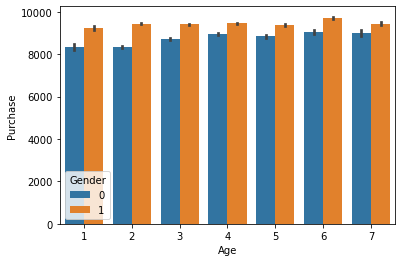

In [26]:
sns.barplot('Age','Purchase',hue='Gender',data=total_df)

We can see that male has purchases more than female
There is no much difference in purchase of ages 18-25,26-35,36-45, 46-50,51-55
Meanwhile ages 0-17 and 55+ have smaller purchases.

Further investigation into gender

([<matplotlib.patches.Wedge at 0x1fb5f317760>,
 [Text(-0.784896600247869, 0.7706732945414271, '1'),
  Text(0.7848966363256884, -0.7706732577977651, '0')],
 [Text(-0.4281254183170194, 0.4203672515680511, '75%'),
  Text(0.42812543799582997, -0.42036723152605365, '25%')])

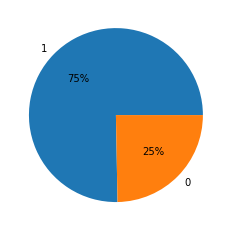

In [27]:
gender_names=total_df.Gender.value_counts().index
gender_val=total_df.Gender.value_counts().values
plt.pie(gender_val,labels=gender_names, autopct='%1.f%%')

The ecommerce is made up of 75% Male and 25% Female. 
More adds to be targeted at Females

Purchase Against occupation

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

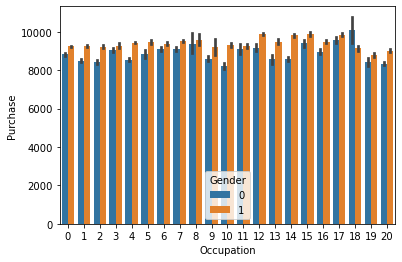

In [28]:
sns.barplot('Occupation','Purchase',hue='Gender',data=total_df)

There is no much differences with respect to occupation (Uniform Purchase) no need to target any particular occupation

Product Categories Against Purchase

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

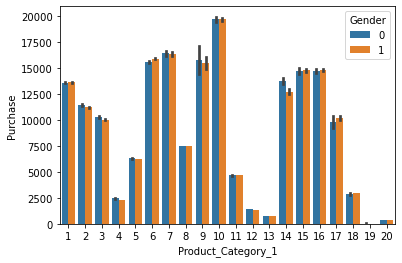

In [29]:
sns.barplot('Product_Category_1','Purchase',hue='Gender',data=total_df)

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

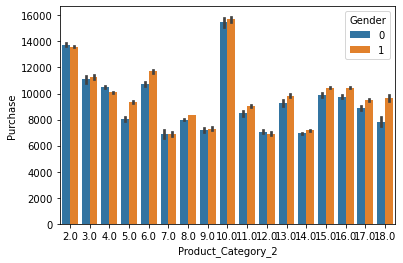

In [30]:
sns.barplot('Product_Category_2','Purchase',hue='Gender',data=total_df)

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

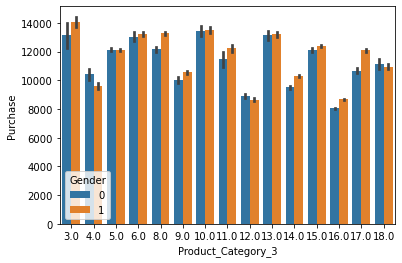

In [31]:
sns.barplot('Product_Category_3','Purchase',hue='Gender',data=total_df)

Product Category 1 and 3 have the highest and least purchases with purchase axis upto 20000 and 14000 respectively

Correlation between the features

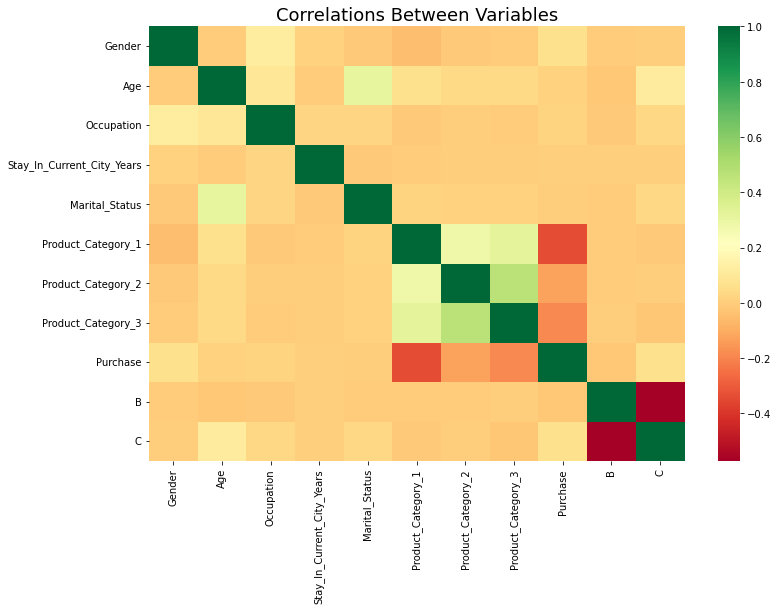

In [32]:
plt.figure(figsize=(12,8)) #correlations between the features
sns.heatmap(total_df.corr(),fmt="", cmap="RdYlGn")
plt.title("Correlations Between Variables", size=18)
plt.show()

The Heatmap is not giviving much information because it works well in understanding the relationship that exists 
between continous data, but most of our features are categorical

In [33]:
test_df =total_df[total_df['Purchase'].isnull()]

In [34]:
test_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,1,5,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,1,3,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,0,4,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,0,4,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,0,3,1,1,0,4,5.0,12.0,NaN,0,1


In [35]:
train_df=total_df[~total_df['Purchase'].isnull()]
train_df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


Splitting the train dataset into dependent feature y and independent features X

In [36]:
X=train_df.drop('Purchase',axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,0,1


In [37]:
y=train_df['Purchase']
y.head()

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

# Models

importing train test split

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
X_train.drop('Product_ID',axis=1, inplace=True)##product id is not needed for the model
X_test.drop('Product_ID',axis=1, inplace=True)

scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

Training with LinearRegressor, Ridge, Lasso, ElasticNet, DecisionTreeRegressor, RandomForestRegressor
using r2_score and mean_squared_error as metrics

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt

In [42]:
#linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [43]:
pred_train_lr= lr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)

print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

4683.692937784464
0.13146127832240473
4674.395461552324
0.13039017555086907


In [44]:
##Ridge
rr = Ridge(alpha=0.01)
rr.fit(X_train, y_train) 

Ridge(alpha=0.01)

In [45]:
pred_train_rr= rr.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))

4683.692937784464
0.13146127832240473
4674.395461449372
0.13039017558917465


In [46]:
##lasso Regression
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [47]:
pred_train_lasso= model_lasso.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

4683.692937905862
0.13146127827738108
4674.395523784326
0.1303901523959775


In [48]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=1000,max_depth=7,eta=0.1,subsample=0.7,colsample_bytree=0.8)
xg=xg.fit(X_train, y_train)

In [49]:
pred_train_xg= xg.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_xg)))
rmse=(np.sqrt(mean_squared_error(y_train,pred_train_xg)))
print(r2_score(y_train, pred_train_xg))
score = (r2_score(y_train, pred_train_xg))

pred_test_xg= xg.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_xg)))
rmse=(np.sqrt(mean_squared_error(y_test,pred_test_xg)))
print(r2_score(y_test, pred_test_xg))
score = (r2_score(y_train, pred_train_xg))

2744.715352231621
0.701731783013493
2889.4705756338954
0.6677154973117436


In [50]:
#ElasticNet
model_enet = ElasticNet()
model_enet.fit(X_train, y_train) 

ElasticNet()

In [51]:
pred_train_enet= model_enet.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_enet)))
print(r2_score(y_train, pred_train_enet))

pred_test_enet= model_enet.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_enet)))
print(r2_score(y_test, pred_test_enet))

4716.319954355919
0.1193184971707455
4705.611483066957
0.11873673283763198


In [52]:
#comparison of model test scores
evaluated_models=['lr', 'rr', 'lasso', 'xg', 'enet']

In [53]:
evaluated_test_scores= [0.13039017555086907, 0.13039017558917465,0.1303901523959775,0.6677154973117436,0.11873673283763198]
evaluated_train_scores=[0.13146127832240473, 0.13146127832240473,0.13146127827738108,0.701731783013493,0.1193184971707455]

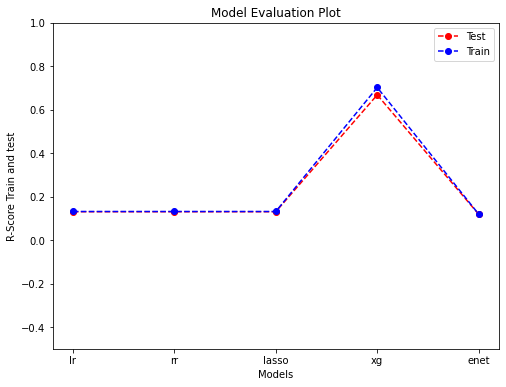

In [54]:
plt.figure(figsize=(8,6))
plt.plot(evaluated_models,evaluated_test_scores,marker="o",linestyle="--",color="r", label='Test')
plt.plot(evaluated_models,evaluated_train_scores,marker="o",linestyle="--",color="b", label='Train')
plt.ylim(-0.5,1)
plt.title("Model Evaluation Plot")
plt.xlabel("Models")
plt.ylabel("R-Score Train and test")
plt.legend()
plt.show()

In [60]:
#comparison of models test rmse
evaluated_models=['lr', 'rr', 'lasso', 'xg', 'enet']
evaluated_test_rmse = [4674.395461552324, 4674.395461449372, 4674.395523784326, 2889.4705756338954, 4705.611483066957]
evaluated_train_rmse = [4683.692937784464, 4683.692937784464, 4674.395523784326, 2744.715352231621, 4716.319954355919]

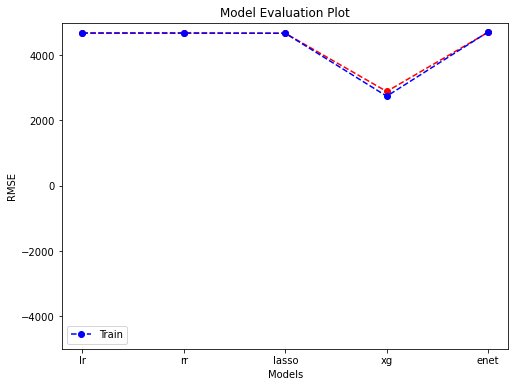

In [61]:
plt.figure(figsize=(8,6))
plt.plot(evaluated_models,evaluated_test_rmse,marker="o",linestyle="--",color="r")
plt.plot(evaluated_models,evaluated_train_rmse,marker="o",linestyle="--",color="b", label='Train')
plt.ylim(-5000,5000)
plt.title("Model Evaluation Plot")
plt.xlabel("Models")
plt.ylabel("RMSE")
plt.legend()
plt.show()

xgboost gives the best performance hence it should be deployed and used for the purchase prediction using Django